In [527]:
import altair as alt
import pandas as pd

In [528]:
df = pd.read_csv("freezing_broken_totals.txt")
df = df.iloc[3:] # exclude mal-formatted years
df.DAYS = df.DAYS.str.replace('-','').replace('', 0).astype(int)

df['year_1'] = df.WINTER.str[:4]
df['year_2'] = df.WINTER.str[:2] + df.WINTER.str[5:]

df['CLOSED_with_year_wrong'] = pd.to_datetime(df.year_1 + " " + df.CLOSED, format='%Y %d %b')
df['OPENED_with_year_wrong'] = pd.to_datetime(df.year_2 + " " + df.OPENED, format='%Y %d %b')

df.loc[df.CLOSED_with_year_wrong.dt.month > 6, 'CLOSED_year'] = df.year_1
df.loc[df.CLOSED_with_year_wrong.dt.month <= 6, 'CLOSED_year'] = df.year_2

df.loc[df.OPENED_with_year_wrong.dt.month > 6, 'OPENED_year'] = df.year_1
df.loc[df.OPENED_with_year_wrong.dt.month <= 6, 'OPENED_year'] = df.year_2

df['CLOSED_with_year'] = pd.to_datetime(df.CLOSED_year + df.CLOSED, format='%Y%d %b')
df['OPENED_with_year'] = pd.to_datetime(df.OPENED_year+ df.OPENED, format='%Y%d %b')

df.loc[df.CLOSED_with_year.dt.month > 6, 'CLOSED_fixed_year'] = '2000'
df.loc[df.CLOSED_with_year.dt.month <= 6, 'CLOSED_fixed_year'] = '2001'

df.loc[df.OPENED_with_year.dt.month > 6, 'OPENED_fixed_year'] = '2000'
df.loc[df.OPENED_with_year.dt.month <= 6, 'OPENED_fixed_year'] = '2001'

df['CLOSED_with_fixed_year'] = pd.to_datetime(df.CLOSED_fixed_year + df.CLOSED, format='%Y%d %b')
df['OPENED_with_fixed_year'] = pd.to_datetime(df.OPENED_fixed_year+ df.OPENED, format='%Y%d %b')

df = df[['WINTER', 'CLOSED', 'OPENED', 'DAYS', 'CLOSED_with_year', 'OPENED_with_year', 'CLOSED_with_fixed_year', 'OPENED_with_fixed_year']]

In [529]:
df.head()

,WINTER,CLOSED,OPENED,DAYS,CLOSED_with_year,OPENED_with_year,CLOSED_with_fixed_year,OPENED_with_fixed_year
3,1855-56,18 Dec,14 Apr,118,1855-12-18,1856-04-14,2000-12-18,2001-04-14
4,1856-57,6 Dec,6 May,151,1856-12-06,1857-05-06,2000-12-06,2001-05-06
5,1857-58,25 Nov,26 Mar,121,1857-11-25,1858-03-26,2000-11-25,2001-03-26
6,1858-59,8 Dec,14 Mar,96,1858-12-08,1859-03-14,2000-12-08,2001-03-14
7,1859-60,7 Dec,26 Mar,110,1859-12-07,1860-03-26,2000-12-07,2001-03-26


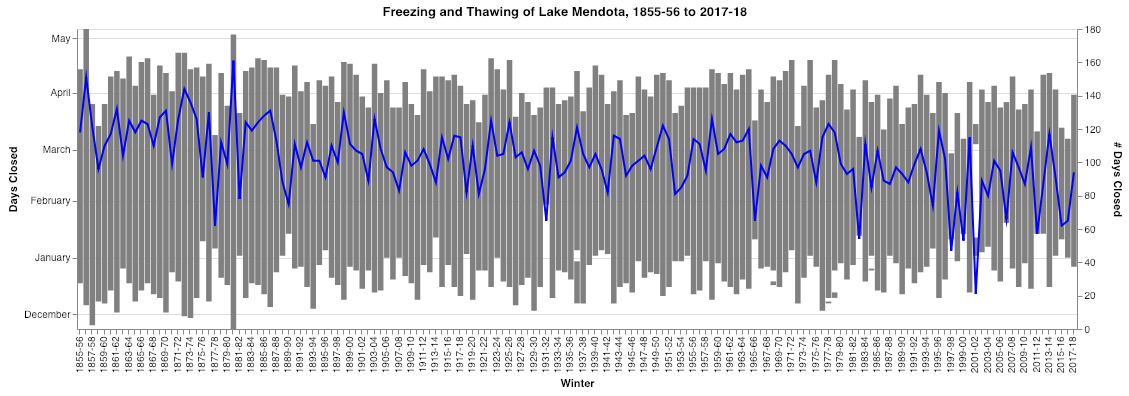

In [532]:
base = alt.Chart(df).encode(
    x=alt.X('WINTER', axis=alt.Axis(title='Winter', labelOverlap="parity")),
    tooltip=[
        alt.Tooltip('WINTER', title='Winter'),
        alt.Tooltip('min(CLOSED_with_year)', title='Closed', format='%x'),
        alt.Tooltip('min(OPENED_with_year)', title='Opened', format='%x'),
        alt.Tooltip('sum(DAYS)', title='# Days Closed'),
    ]
).properties(width=1000, title='Freezing and Thawing of Lake Mendota, 1855-56 to 2017-18')

bar = base.mark_bar(color='grey').encode(
    y=alt.Y('OPENED_with_fixed_year:T', axis=alt.Axis(title='Days Closed', format='%B')),
    y2='CLOSED_with_fixed_year:T',
)

line = base.mark_line(color='blue').encode(
    y=alt.Y('sum(DAYS):Q', axis=alt.Axis(title="# Days Closed", grid=False))
)

bar + line

In [533]:
(bar + line).save('freezing.html')